# پروژه نهایی تحلیل داده 

## معرفی پروژه
برای پروژه نهایی قرار است که با مجموعه داده سرشماری بزرگسالان ایالات متحده آمریکا کار کنم که در آن درآمد را به عوامل اجتماعی از جمله سن، تحصیلات، وضعیت تاهل، نژاد، جنسیت و چند مورد دیگر مرتبط می کند. مجموعه داده ها از رپیزوتری دانشگاه کالیفرنیا، ایروین به دست آمده است.با این که داده ها قدیمی هستند اما مهم است که ببینیم چگونه عوامل اجتماعی که به درآمد کمک می کنند و در صورت انتشار داده های جدید میتوان بررسی کرد که چطور در طول سال ها تاثیرات این عوامل تغییر کرده اند. به این ترتیب ما می توانیم متوجه شویم که آیا پیشرفتی در پر کردن شکاف درآمدی بر اساس این عوامل صورت گرفته است یا خیر؟

## دیتا
فایل اول شامل 32561 ردیف و فایل دوم با نام تست شامل 16281 ردیف است. برای اهداف تحلیلی ما از فایل اول استفاده میشود و در نهایت سعی میکنم مدلی ارائه کنم که بتواند با توجه به ویژگی های اجتماعی درآمد افراد را پیشبینی کند برای بررسی دقت مدل از دیتای دوم برای دقت سنجی مدل استفاده خواهد شد.
برخی از نقاط در داده های ما مقدار ندارد که این موارد متناسب با شرایط حذف یا با توجه به شرایط مقداری برای آن ها در نظر گرفته خواهد شد.

## سوالات تحقیق
1.	آیا شکاف‌های درآمدی بر اساس عوامل اجتماعی (جنسیت، نژاد، سن، وضعیت تأهل و تحصیلات) وجود دارد؟
* بر اساس دانش فعلی، انتظار می‌رود که شکاف‌های درآمدی بر اساس عوامل اجتماعی وجود داشته باشد هرچند این موضوع باید با استفاده از داده‌ها ثابت شود.
2.	کدام عامل اجتماعی بزرگ‌ترین تعیین‌کننده درآمد است؟
* بدون دانش قبلی، انتظار می‌رود که تحصیلات بیشترین تأثیر را بر درآمد داشته باشد.
3.	آیا می‌توانیم با داشتن مجموعه‌ای از عوامل اجتماعی پیش‌بینی کنیم که درآمد فرد بیش از 50 هزار دلار یا کمتر خواهد بود؟
* بله، انتظار دارم بتوانیم طبقه‌بندی درآمد فرد را پیش‌بینی کنیم. به‌طور تقریبی انتظار دارم دقت این پیش‌بینی ممکن است بیشتر از 75 درصد باشد.
4.	با نادیده گرفتن درآمد، چه عواملی به شدت با یکدیگر همبستگی دارند؟
* به نظر می‌رسد که تحصیلات بیشترین تأثیر را بر درآمد دارد، اما احتمالاً تحصیلات با سایر عوامل نیز همبستگی بالایی دارد. پیش‌بینی می‌شود که بیشترین همبستگی بین تحصیلات و نژاد باشد.
5.	چگونه وضعیت تأهل بر توزیع درآمد تأثیر می‌گذارد؟
* انتظار میرود که افراد متاهل به طور کلی دارای درآمد بیشتری نسبت به افراد مجرد داشته باشند.
6.	آیا جنسیت و نژاد به طور همزمان بر درآمد تأثیر می‌گذارند؟
* تحلیل تأثیر همزمان این دو عامل می‌تواند به شناسایی نابرابری‌های کمک کند. انتظار میرود که هردوی این عوامل بر درآمد افراد تاثیرگذار باشند.
7.	آیا سطح تحصیلات با نوع شغل همبستگی دارد؟
*  می‌توانیم بررسی کنیم که آیا افراد با تحصیلات بالاتر در مشاغل تخصصی یا مدیریتی قرار دارند.
8.	آیا ساعات کاری هفتگی بر درآمد تأثیر می‌گذارد؟
*  این سوال می‌تواند رابطه بین زمان کاری و سطح درآمد را تحلیل کند انتظار میرود که رابطه مستقیمی بین ساعت کاری و درآمد افراد مشاهده شود.
9.	چه تفاوت‌هایی در توزیع درآمد بین مردان و زنان با سطح تحصیلات مشابه وجود دارد؟
*  این سوال بررسی می‌کند که آیا با داشتن تحصیلات مشابه، درآمد زنان و مردان همچنان متفاوت است یا خیر.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('census.csv')
data.head()

,age,workclass,final weight,education,education num,marital-status,occupation,relationship\t,race,sex,Unnamed: 10,Unnamed: 11,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


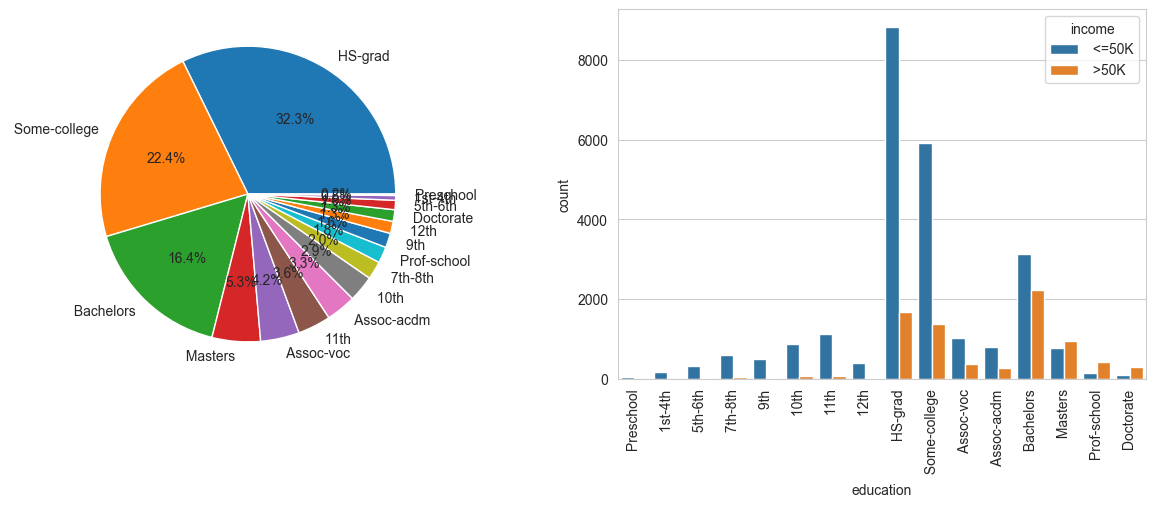

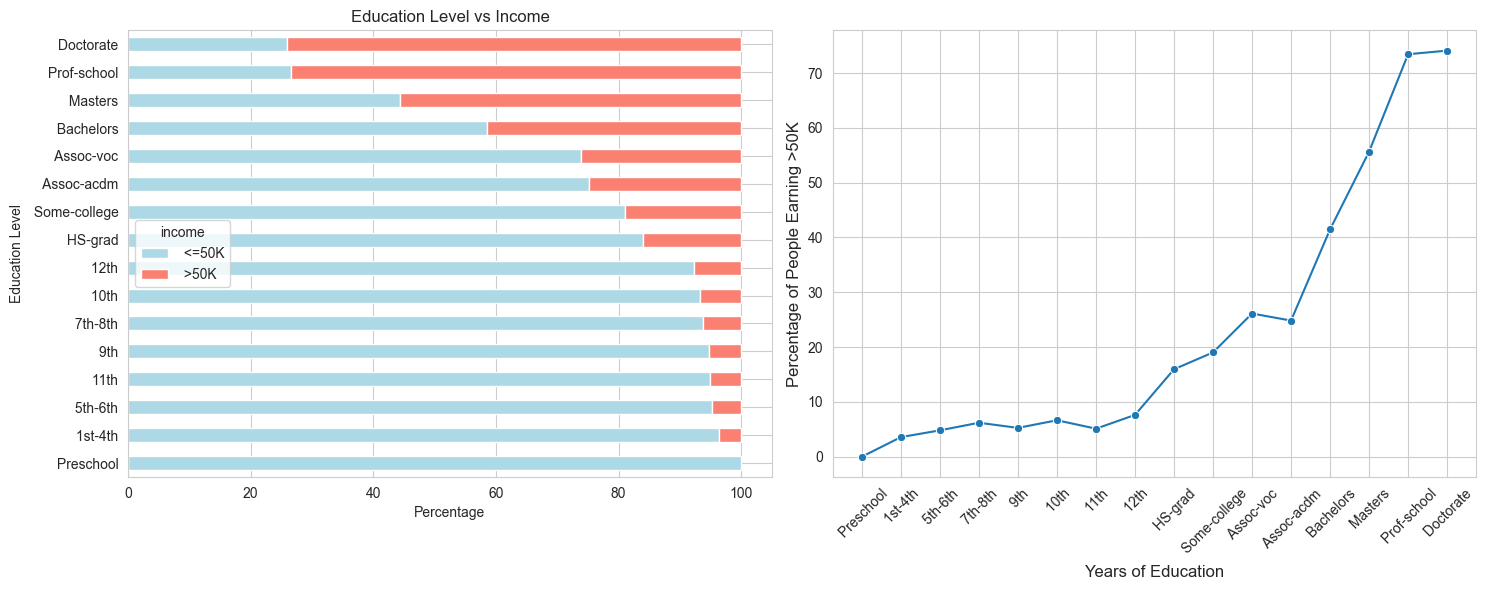

In [3]:
edu = data['education'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
data['education'].value_counts().sort_values()
education = data.groupby('education')['education num'].unique().sort_values()
index_list = education.index.to_list()
sns.countplot(x="education", hue='income', data=data, order=index_list)
ax1.pie(edu, labels=edu.index.to_list(), autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
education_income = pd.crosstab(data['education'], data['income'], normalize='index') * 100
education_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.title('Education Level vs Income')

plt.subplot(1, 2, 2)
data['income_numeric'] = data['income'].apply(lambda x: 1 if x == ' >50K' else 0)
education_income_mean = data.groupby('education num')['income_numeric'].mean() * 100
sns.lineplot(x=index_list, y=education_income_mean.values, marker='o')
plt.xlabel('Years of Education', fontsize=12)
plt.ylabel('Percentage of People Earning >50K', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* همانطور که مشاهده میشود بیشتر جامعه را فارغ التحصیلان دبیرستان و کالج تشکیل میدهند همچنین نسبت افراد با درامد بیشتر از پنجاه هزار دلار با افزایش تحصیلات بیشتر میشود به صورتی که در گروه افراد با مدرک بالاتر از لیسانس تعداد افراد با درامد بیش از پنجاه هزار دلار بیشتر از افرادی با درآمد کمتر از این میزان هستند. بیشترین شیب نمودار افزایش درآمد از مقطع لیسانس تا دکترا مشاهده میشود بنابرین میتوان برداشت کرد که با دریافت مدرک لیسانس و ادامه تحصیل  بیشترین شانس را برای افزایش درآمد به بیش از 50هزار دلار خواهیم داشت هرچند با دریافت مدرک دکترا تغییر معناداری در افزایش درآمد به بیش از پنجاه هزار دلار مشاهده نمیشود.

In [34]:
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

* در فیلد طبقه بندی کارها 1893 مورد با عنوان ؟ ثبت شده اند و دیتایی برای آن ها وجود ندارد از آنجایی که پایتون ؟ را به عنوان دیتای گم شده تشخیص نمیدهد ابتدا این مقدار را جایگزین میکنیم


In [35]:
data['workclass'] = np.where(data['workclass'] == ' ?', np.NaN, data['workclass'])

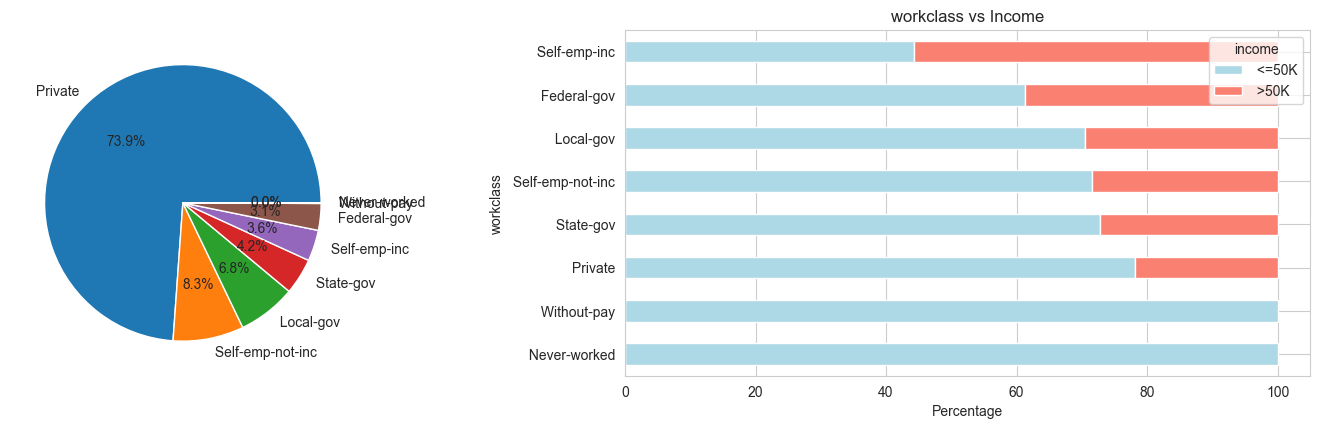

In [36]:
workcls = data['workclass'].value_counts()
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.pie(workcls, labels=workcls.index, autopct='%1.1f%%')


plt.subplot(2, 2, 2)
workcls_income = pd.crosstab(data['workclass'], data['income'], normalize='index') * 100
workcls_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('workclass')
plt.title('workclass vs Income')
plt.tight_layout()


plt.show()

* بزرگترین گروه شغلی در جامعه آماری ما متعلق به کارکنان خصوصی میباشد هرچند این گروه مطابق با انتظار کمترین نسبت را در درامدهای بالای پنجاه هزار دلار دارند به طور نسبی بیشترین درآمد متعلق به دسته خویش فرمایان با ثبت شرکت تعلق دارد هرچند این گروه کوچکترین بخش جامعه کارکنان ما را تشکیل میدهند اما بیشتر اعضای این گروه درآمد بالای پنجاه هزار دلار دارند پس از این گروه کارمندان دولت فدرال توانسته اند بهترین عملکرد درآمدی را داشته باشند.




In [37]:
data['marital-status'].value_counts()


marital-status
0    24720
1     7841
Name: count, dtype: int64

NameError: name 'index_list' is not defined

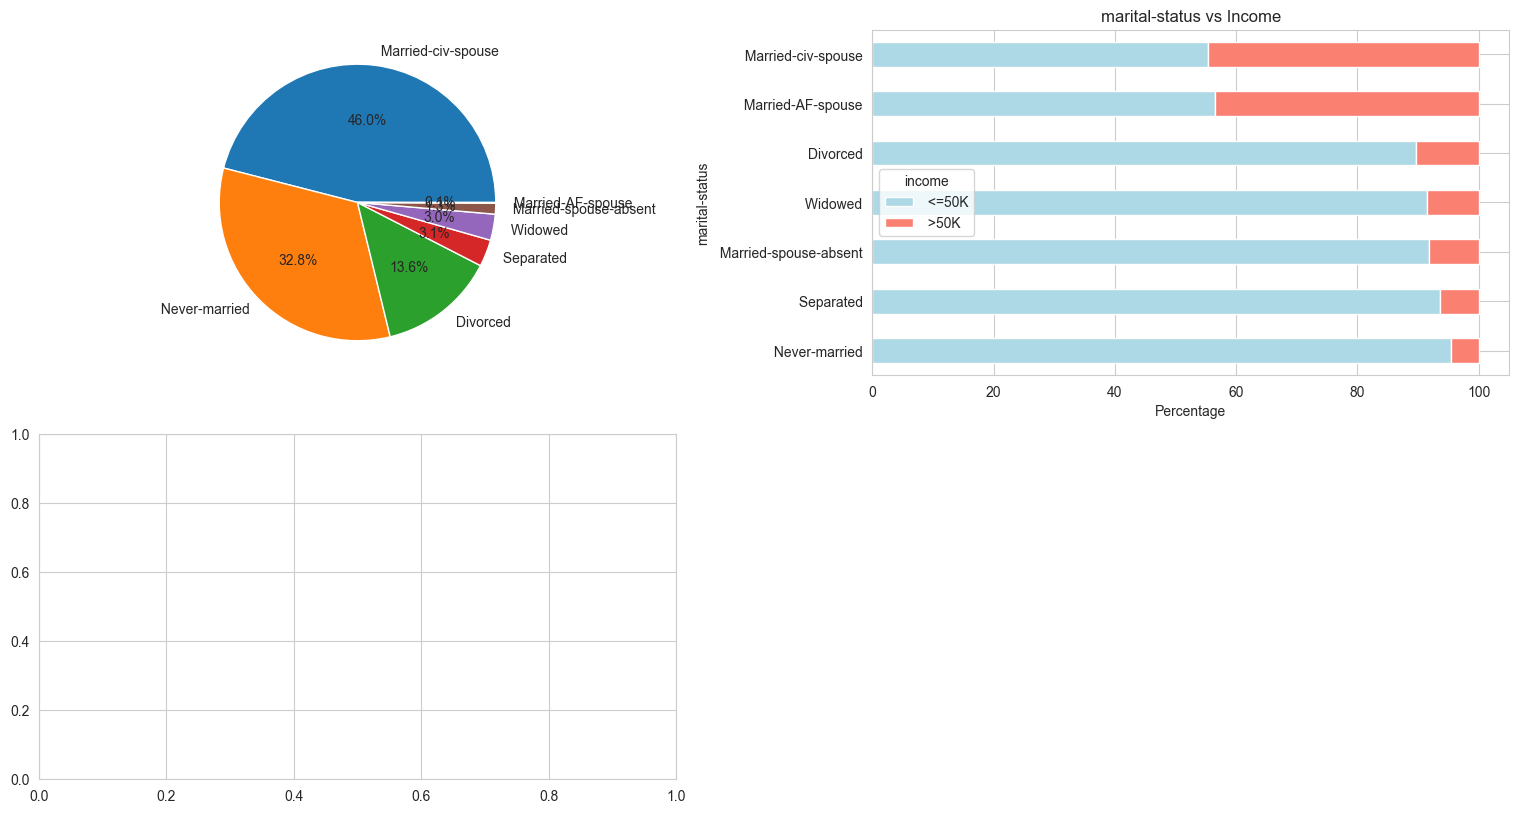

In [4]:
marital_status = data['marital-status'].value_counts()
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')


plt.subplot(2, 2, 2)
marital_status_income = pd.crosstab(data['marital-status'], data['income'], normalize='index') * 100
marital_status_income.sort_values(by=' >50K').plot(kind='barh', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.xlabel('Percentage')
plt.ylabel('marital-status')
plt.title('marital-status vs Income')
plt.tight_layout()

plt.subplot(2, 2, 3)
data['marital-status'] = data['income'].apply(lambda x: 1 if x == ' >50K' else 0)
sns.lineplot(x=index_list, y=data['marital-status'].values, marker='o')
plt.xlabel('Years of Education', fontsize=12)
plt.ylabel('Percentage of People Earning >50K', fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [5]:
data['marital-status'].index
data

,age,workclass,final weight,education,education num,marital-status,occupation,relationship\t,race,sex,Unnamed: 10,Unnamed: 11,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,0,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,1,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,0,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,0,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
